# Spotify Primer


## Step 1: Create a Spotify Developer Account

https://developer.spotify.com/dashboard/applications

## Step 2: Create a Client App using the Account

![images/spotify1.png](images/spotify1.png)


## Step 3: Install the Client libraries
(first always conda activate your_environment)

pip install spotipy

Spotipy documentation: https://spotipy.readthedocs.io/en/latest/

In [9]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [10]:
#Create the connection and retrieve the spotify object

client = "xxx"
secret = "xxx"
username = "xxx"
client_credentials_manager = SpotifyClientCredentials(client_id=client, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Get a Playlist ID via "Share/Teilen" and "Copy Link/Playlistlink kopieren"


https://open.spotify.com/playlist/37i9dQZF1DX8MtmyPcHg1L?si=9j8xOz6DSJuJpT_6Q5Z_xw
    
Playlist ID = 37i9dQZF1DX8MtmyPcHg1L
    

In [11]:
slayer_playlist_id = '37i9dQZF1DX8MtmyPcHg1L'

In [ ]:
slayer_playlist = sp.user_playlist(username, slayer_playlist_id)
slayer_playlist

In [13]:
slayer_tracks = slayer_playlist['tracks']
slayer_songs = slayer_tracks['items']
while slayer_tracks['next']:
    slayer_tracks = sp.next(slayer_tracks)
    [slayer_songs.append(item) for item in slayer_tracks['items']]

In [ ]:
slayersong_ids = [slayer_songs[i]['track']['id'] for i in range(0, len(slayer_songs))]

print('\n'.join([str(slayersong_ids[i]) for i in range(0,20)]))

In [15]:
features = []
for i in range(0, len(slayersong_ids), 50):
    audio_features = sp.audio_features(slayersong_ids[i:i + 50])
    for track in audio_features:
        if track is not None:
            features.append(track)
            features[len(features) - 1]['class'] = 1

In [ ]:
features

Get a second Playlist

https://open.spotify.com/playlist/37i9dQZF1DWUWUfWSLE7dn?si=IlISr8JmSKKjm__edgVlZw

In [17]:
reading_playlist_id = '37i9dQZF1DWUWUfWSLE7dn'
reading_playlist = sp.user_playlist(username, reading_playlist_id)
reading_tracks = reading_playlist['tracks']
reading_songs = reading_tracks['items']
while reading_tracks['next']:
    reading_tracks = sp.next(reading_tracks)
    [reading_songs.append(item) for item in reading_tracks['items']]
readingsong_ids = [reading_songs[i]['track']['id'] for i in range(0, len(reading_songs))]

In [18]:
for i in range(0, len(readingsong_ids), 50):
    audio_features = sp.audio_features(readingsong_ids[i:i + 50])
    for track in audio_features:
        if track is not None:
            features.append(track)
            features[len(features) - 1]['class'] = 0

In [ ]:
features

In [20]:
# Convert to data frame remove irrelevant features
import pandas as pd
df = pd.DataFrame(features)
non_features = ['analysis_url', 'id', 'track_href', 'type', 'uri']
df.drop(labels=non_features, axis=1, inplace=True)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,class
0,0.3240,0.99400,1,-4.366,0,0.1410,0.000091,0.3470,0.0916,0.0841,105.012,291773,4,1
1,0.3140,0.99100,5,-3.852,0,0.3490,0.000139,0.0652,0.1100,0.0396,138.777,298533,4,1
2,0.3010,0.99500,1,-4.394,0,0.1590,0.000417,0.2950,0.1250,0.0374,88.150,255187,4,1
3,0.4020,0.99400,8,-7.338,0,0.0623,0.000038,0.0934,0.1450,0.2470,104.111,199867,4,1
4,0.2340,0.99400,8,-3.659,1,0.2290,0.001170,0.0169,0.1670,0.0629,95.052,215693,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.1870,0.02750,5,-27.442,0,0.0348,0.977000,0.8660,0.1160,0.0894,81.322,176250,4,0
93,0.1290,0.23200,0,-16.947,0,0.0353,0.782000,0.8640,0.1030,0.0333,80.807,411000,4,0
94,0.2910,0.03720,11,-21.056,0,0.0411,0.977000,0.8050,0.0602,0.1070,144.228,409640,3,0
95,0.0828,0.05980,9,-20.795,1,0.0410,0.982000,0.7740,0.0973,0.0380,65.840,175260,3,0


In [21]:
slayer_features = df[df['class'] == 1]
reading_features = df[df['class'] == 0]

<AxesSubplot:xlabel='tempo', ylabel='Count'>

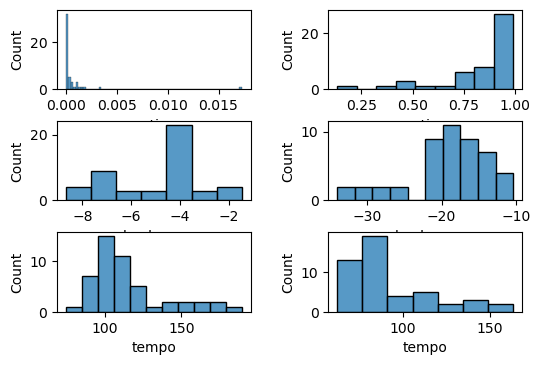

In [22]:
# Plot features
# conda install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(dpi=100)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.add_subplot(3, 2, 1)
sns.histplot( slayer_features["acousticness"])
fig.add_subplot(3, 2, 2)
sns.histplot( reading_features["acousticness"])

fig.add_subplot(3, 2, 3)
sns.histplot( slayer_features["loudness"])
fig.add_subplot(3, 2, 4)
sns.histplot( reading_features["loudness"])


fig.add_subplot(3, 2, 5)
sns.histplot( slayer_features["tempo"])
fig.add_subplot(3, 2, 6)
sns.histplot( reading_features["tempo"])

